In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from matplotlib import pyplot as plt, colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, make_scorer
%matplotlib inline
%matplotlib notebook

***ЗАДАНИЕ 1***

Загрузите данные из файла reglab1.txt. Используя функцию lm, постройте регрессию (используйте разные модели). Выберите наиболее подходящую модель, объясните свой выбор.

In [2]:
data = pd.read_csv("reglab1.txt", sep='\t')
data.head()

,z,x,y
0,2.836772,0.271010,0.308331
1,4.987167,0.589598,0.514913
2,6.412325,0.651744,0.730453
3,4.641998,0.581983,0.461400
4,2.793941,0.463688,0.191102


In [3]:
data.shape

(200, 3)

<IPython.core.display.Javascript object>


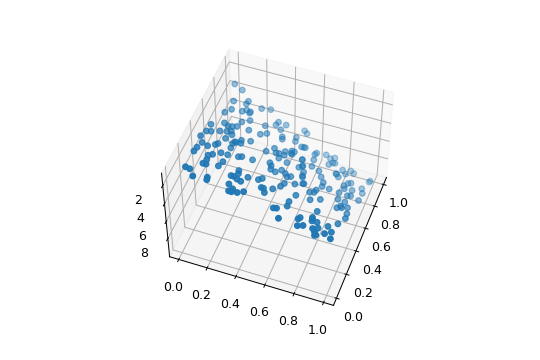

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(data.x.to_numpy(), data.y.to_numpy(), data.z.to_numpy())
ax.view_init(-130, -20)

In [5]:
target = 'y'
X, y = data.drop(target, axis=1), data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
def pipeline(model):
    model.fit(X_train, y_train)
    print(mean_squared_error(model.predict(X_test), y_test))
    
models = {'linear': LinearRegression(), 'ridge': Ridge(), 'lasso': Lasso(), 'elastic net': ElasticNet()}

In [7]:
for name, model in models.items():
    print(name)
    pipeline(model)

linear
0.004036768706830431
ridge
0.0036552721488889934
lasso
0.08673704680093536
elastic net
0.08673704680093536


***ЗАДАНИЕ 2***

Реализуйте следующий алгоритм для уменьшения количества признаков, используемых для построения регрессии: для каждого  выбрать подмножество признаков мощности , минимизирующее остаточную сумму квадратов RSS. Используя полученный алгоритм, выберите оптимальное подможество признаков для данных из файла reglab2.txt. Объясните свой выбор. Для генерации всех возможных сочетаний по m элементов из некоторого множества x можно использовать функцию combn(x, m, ...). 

In [8]:
data = pd.read_csv('reglab2.txt', sep='\t')
data

,y,x1,x2,x3,x4
0,3.469720,0.233628,0.835549,0.102965,0.457428
1,0.768448,0.117920,0.090544,0.258778,0.283951
2,2.880374,0.091520,0.797592,0.198528,0.699287
3,3.745485,0.876722,0.062935,0.615415,0.176058
4,1.853966,0.207406,0.303490,0.775967,0.667351
...,...,...,...,...,...
195,0.820625,0.163545,0.033599,0.383312,0.645846
196,4.676726,0.983839,0.225527,0.127676,0.757216
197,3.471228,0.661587,0.231570,0.800238,0.609558
198,3.633997,0.828217,0.076275,0.129719,0.965084


In [9]:
from itertools import combinations
res = []
for n_feat in range(1, 5):
    res += combinations(data.drop('y', axis=1).columns, r=n_feat)
res

[('x1',),
 ('x2',),
 ('x3',),
 ('x4',),
 ('x1', 'x2'),
 ('x1', 'x3'),
 ('x1', 'x4'),
 ('x2', 'x3'),
 ('x2', 'x4'),
 ('x3', 'x4'),
 ('x1', 'x2', 'x3'),
 ('x1', 'x2', 'x4'),
 ('x1', 'x3', 'x4'),
 ('x2', 'x3', 'x4'),
 ('x1', 'x2', 'x3', 'x4')]

In [10]:
def pipeline(model, data, target='y'):
    X, y = data.drop(target, axis=1), data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model.fit(X_train, y_train)
    print(mean_squared_error(model.predict(X_test), y_test))
    return mean_squared_error(model.predict(X_test), y_test)

In [11]:
results = dict()
for feat_sample in res:
    print(feat_sample, end='\t\t')
    results[str(feat_sample)] = pipeline(LinearRegression(), data[list(feat_sample) + ['y']])

('x1',)		0.6245217842264074
('x2',)		1.4746170487077692
('x3',)		1.8792109761518305
('x4',)		1.9697607113677424
('x1', 'x2')		0.003212483539603571
('x1', 'x3')		0.7899897431870213
('x1', 'x4')		0.9518004459668419
('x2', 'x3')		1.237794016116443
('x2', 'x4')		1.3880284371593177
('x3', 'x4')		1.6411388285458748
('x1', 'x2', 'x3')		0.0011561928870323314
('x1', 'x2', 'x4')		0.0024501815082571283
('x1', 'x3', 'x4')		0.9143681994552907
('x2', 'x3', 'x4')		1.260674674308537
('x1', 'x2', 'x3', 'x4')		0.0014424867563488486


In [12]:
a = list(results.items())
a.sort(key=lambda x: x[1])
for val in a:
    print(val)

("('x1', 'x2', 'x3')", 0.0011561928870323314)
("('x1', 'x2', 'x3', 'x4')", 0.0014424867563488486)
("('x1', 'x2', 'x4')", 0.0024501815082571283)
("('x1', 'x2')", 0.003212483539603571)
("('x1',)", 0.6245217842264074)
("('x1', 'x3')", 0.7899897431870213)
("('x1', 'x3', 'x4')", 0.9143681994552907)
("('x1', 'x4')", 0.9518004459668419)
("('x2', 'x3')", 1.237794016116443)
("('x2', 'x3', 'x4')", 1.260674674308537)
("('x2', 'x4')", 1.3880284371593177)
("('x2',)", 1.4746170487077692)
("('x3', 'x4')", 1.6411388285458748)
("('x3',)", 1.8792109761518305)
("('x4',)", 1.9697607113677424)


***ЗАДАНИЕ 3***

Загрузите данные из файла cygage.txt. Постройте регрессию, выражающую зависимость возраста исследуемых отложений от глубины залегания, используя веса наблюдений. Оцените качество построенной модели.

In [13]:
data = pd.read_csv('cygage.txt', sep='\t')
data

,calAge,Depth,Weight
0,0,0,1.0
1,3707,77,0.1
2,4150,90,0.1
3,5350,107,0.1
4,4500,168,0.1
5,7260,217,0.1
6,7630,282,1.0
7,8960,379,0.5
8,10030,440,0.5
9,11940,514,0.5


In [14]:
models = {'linear': LinearRegression(), 'ridge': Ridge(), 'lasso': Lasso(), 'elastic net': ElasticNet()}
for name, model in models.items():
    print(name)
    pipeline(model, data, target='calAge')

linear
876640.3202785181
ridge
323488.5591175023
lasso
2373587.7768015624
elastic net
2281972.5261648316


In [15]:
normal_data = pd.DataFrame(StandardScaler().fit_transform(data))
for name, model in models.items():
    print(name)
    pipeline(model, normal_data, target=0)

linear
0.10055387187849567
ridge
0.08396647893567295
lasso
0.4668123057464165
elastic net
1.2931399602387756


In [16]:
normal_data

,0,1,2
0,-1.699761,-1.362927,1.875974
1,-0.900833,-1.012622,-0.861934
2,-0.805358,-0.953480,-0.861934
3,-0.546735,-0.876140,-0.861934
4,-0.729926,-0.598626,-0.861934
5,-0.135094,-0.375705,-0.861934
6,-0.055352,-0.079994,1.875974
7,0.231288,0.361299,0.354914
8,0.461893,0.638813,0.354914
9,0.873534,0.975469,0.354914


In [17]:
X, y = data.drop('calAge', axis=1), data.calAge
models = {'linear': LinearRegression(), 'ridge': Ridge(), 'lasso': Lasso(), 'elastic net': ElasticNet()}
for name, model in models.items():
#model = LinearRegression()
    model.fit(X, y)
    print(name, mean_squared_error(model.predict(X), y))

linear 489686.3742178897
ridge 563190.4788989563
lasso 489695.6335029614
elastic net 752028.3832306484


<IPython.core.display.Javascript object>


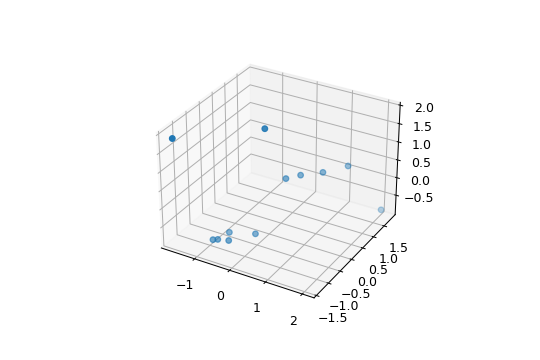

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(normal_data[0], normal_data[1], normal_data[2])

<IPython.core.display.Javascript object>


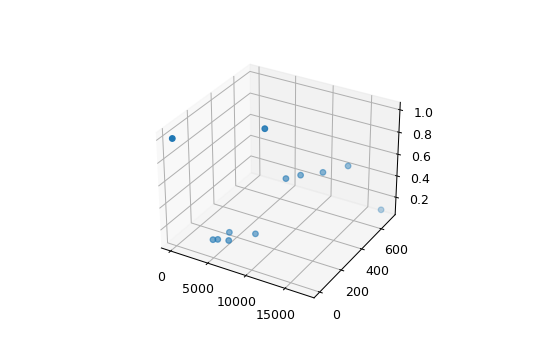

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(data['calAge'], data['Depth'], data['Weight'])

***ЗАДАНИЕ 4***

Загрузите данные Longley (макроэкономические данные). Данные состоят из 7 экономических переменных, наблюдаемых с 1947 по 1962 годы (n=16):

GNP.deflator - дефлятор цен,

GNP - валовой национальный продукт, 

Unemployed – число безработных

Armed.Forces – число людей в армии

Population – население, возраст которого старше 14 лет

Year - год

Employed – количество занятых 

Построить регрессию lm(Employed ~ .) .

Исключите из набора данных longley переменную "Population". Разделите данные на тестовую и обучающую выборки равных размеров случайным образом. Постройте гребневую регрессию для значений , подсчитайте ошибку на тестовой и обучающей выборке для данных значений λ, постройте графики. Объясните полученные результаты.


In [20]:
data = pd.read_csv("longley.csv")
data.head()

,Unnamed: 0,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [21]:
data = data.drop(["Unnamed: 0", ], axis=1)
X, y = data.drop("Employed", axis=1), data.Employed

In [22]:
model = LinearRegression()
model.fit(X, y)
mean_squared_error(model.predict(X), y)

0.05227650346911614

In [23]:
def pipeline(model, data, target='y', test_size=0.1):
    X, y = data.drop(target, axis=1), data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    print(mean_squared_error(model.predict(X_test), y_test))
    return mean_squared_error(model.predict(X_test), y_test)
models = {'linear': LinearRegression(), 'ridge': Ridge(), 'lasso': Lasso(), 'elastic net': ElasticNet()}

In [24]:
for name, model in models.items():
    print(name)
    pipeline(model, data.drop('Population', axis=1), target="Employed", test_size=0.5)

linear
0.20886527605278238
ridge
0.34801372119951557
lasso
0.29591835280422457
elastic net
0.29067431562944646


In [25]:
data = data.drop('Population', axis=1)

In [26]:
X, y = data.drop('Employed', axis=1), data['Employed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [27]:
ys = []
trains = []
xs = np.arange(0.05, 50, 0.05)
for alpha in xs:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    ys.append(mean_squared_error(model.predict(X_test), y_test))
    trains.append(mean_squared_error(model.predict(X_train), y_train))
    #print("alpha = %f, test_score = %f" % (alpha, score))

<IPython.core.display.Javascript object>


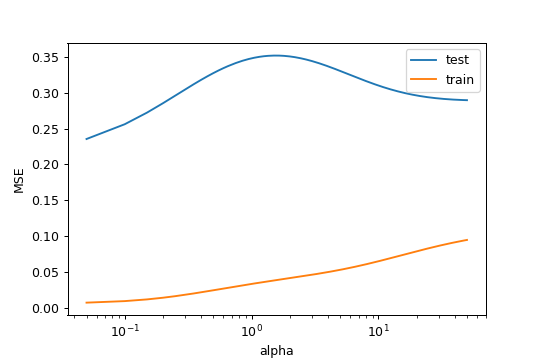

In [28]:
fig, ax = plt.subplots()

ax.plot(xs, ys, label='test')
ax.plot(xs, trains, label='train')
plt.show()
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.xscale('log')
plt.legend()

***ЗАДАНИЕ 5***

Загрузите данные EuStockMarkets из пакета « datasets». Данные содержат ежедневные котировки на момент закрытия фондовых бирж: Germany DAX (Ibis), Switzerland SMI, France CAC, и UK FTSE. Постройте на одном графике все кривые изменения котировок во времени. Постройте линейную регрессию для каждой модели в отдельности и для всех моделей вместе. Оцените, какая из бирж имеет наибольшую динамику.

In [29]:
data = pd.read_csv('EuStockMarkets.csv')
data.head()

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7


<IPython.core.display.Javascript object>


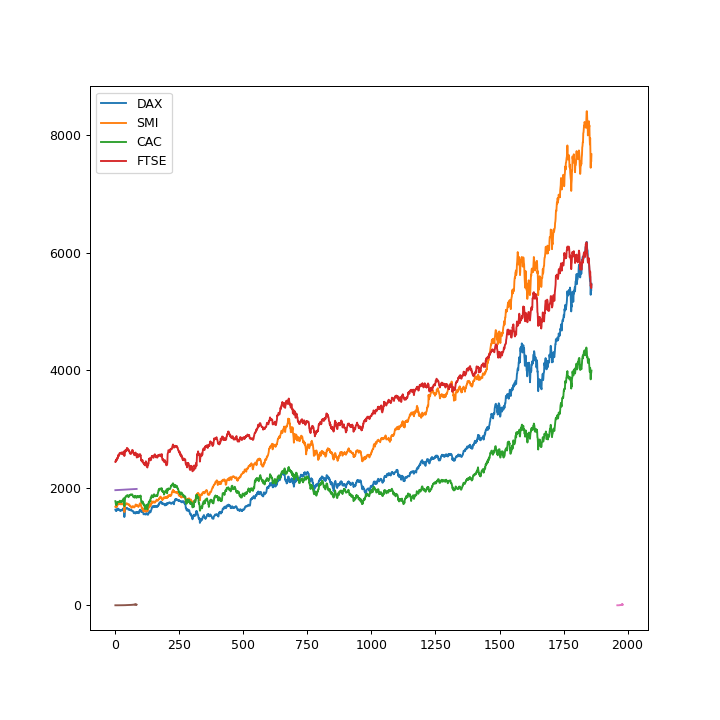

In [30]:
fig, ax = plt.subplots()

ax.plot(data.DAX, label='DAX')
ax.plot(data.SMI, label='SMI')
ax.plot(data.CAC, label='CAC')
ax.plot(data.FTSE, label='FTSE')
#plt.xlabel("alpha")
#plt.ylabel("MSE")
plt.legend()
fig.set_figwidth(8)
fig.set_figheight(8)

In [44]:
X = np.arange(len(data)).reshape((1860, 1))
for c in data.columns:
    y = data[c]
    model = LinearRegression()
    model.fit(X, y)
    print(c, mean_squared_error(model.predict(X), y))
    
    '''fig, ax = plt.subplots()

    ax.plot(X, y)
    #plt.xlabel("alpha")
    #plt.ylabel("MSE")
    #plt.legend()
    fig.set_figwidth(5)
    fig.set_figheight(5)
    ax.plot(X, model.predict(X))
    plt.title(c)'''

DAX 313856.0279617531
SMI 568405.2807941082
CAC 158096.7720491383
FTSE 144761.67938449746


***ЗАДАНИЕ 6***

Загрузите данные JohnsonJohnson из пакета «datasets». Данные содержат поквартальную прибыль компании Johnson & Johnson с 1960 по 1980 гг. Постройте на одном графике все кривые изменения прибыли во времени. Постройте линейную регрессию для каждого квартала в отдельности и для всех кварталов вместе. Оцените, в каком квартале компания имеет наибольшую и наименьшую динамику доходности. Сделайте прогноз по прибыли в 2016 году во всех кварталах и в среднем по году.


In [100]:
data = pd.read_csv("JohnsonJohnson.csv")
data = data.drop("Unnamed: 0", axis=1)
data.head()

,time,value
0,1960.00,0.71
1,1960.25,0.63
2,1960.50,0.85
3,1960.75,0.44
4,1961.00,0.61


Год ошибка:		 2.7252655363912752
Прогноз на 2016: 	 34.55607556275527


<IPython.core.display.Javascript object>


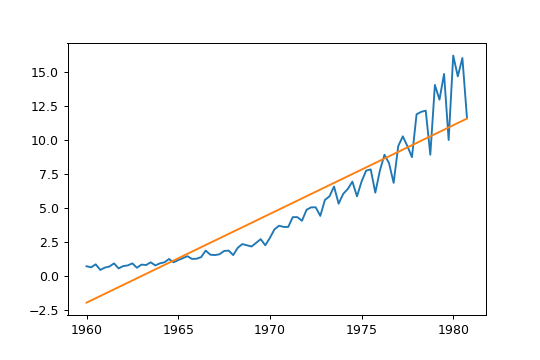

In [101]:
X, y = data.drop('value', axis=1), data.value
model = LinearRegression()
model.fit(X, y)
print('Год ошибка:\t\t', mean_squared_error(model.predict(X), y))
print("Прогноз на 2016: \t", model.predict([[2016]])[0])
fig, ax = plt.subplots()
ax.plot(X, y)
ax.plot(X, model.predict(X))

In [102]:
times = [0.25, 0.5, 0.75, 0]
data_qs = [data[data.time % 1 == times[i]] for i in range(len(times))]

In [103]:
for i in range(len(data_qs)):
    data_q = data_qs[i]
    X, y = data_q.drop('value', axis=1), data_q.value
    model = LinearRegression()
    model.fit(X, y)
    print('Квартал %d ошибка: \t %f' % (i + 1, mean_squared_error(model.predict(X), y)))
    print("Прогноз на 2016: \t", model.predict([[2016]])[0], end='\n\n')

Квартал 1 ошибка: 	 2.093690
Прогноз на 2016: 	 36.31812987012995

Квартал 2 ошибка: 	 2.833634
Прогноз на 2016: 	 37.30176406926398

Квартал 3 ошибка: 	 0.810989
Прогноз на 2016: 	 28.39273160173161

Квартал 4 ошибка: 	 3.462405
Прогноз на 2016: 	 36.75963636363622



***ЗАДАНИЕ 7***

Загрузите данные sunspot.year из пакета «datasets». Данные содержат количество солнечных пятен с 1700 по 1988 гг. Постройте на графике кривую изменения числа солнечных пятен во времени. Постройте линейную регрессию для данных. 

In [72]:
data = pd.read_csv('sunspot.year.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,time,value
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


<IPython.core.display.Javascript object>


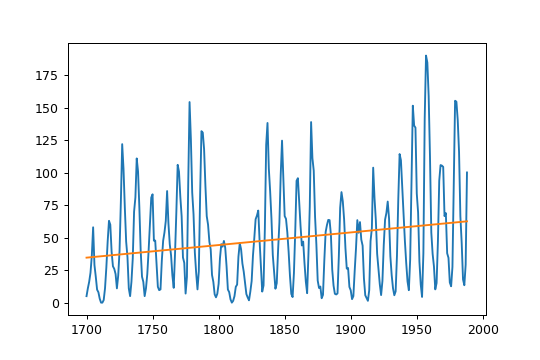

MSE:	 1487.204321435971


In [76]:
X, y = data.drop('value', axis=1), data.value
fig, ax = plt.subplots()
ax.plot(X, y)
ax.plot(X, model.predict(X))

model = LinearRegression()
model.fit(X, y)
print('MSE:\t', mean_squared_error(model.predict(X), y))

***ЗАДАНИЕ 8***

Загрузите данные из файла пакета «UKgas.scv». Данные содержат объемы ежеквартально потребляемого газа в Великобритании с 1960 по 1986 гг. Постройте линейную регрессию для каждого квартала в отдельности и для всех кварталов вместе. Оцените, в каком квартале потребление газа имеет наибольшую и наименьшую динамику доходности. Сделайте прогноз по потреблению газа в 2016 году во всех кварталах и в среднем по году.

In [78]:
data = pd.read_csv("UKgas.csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,time,UKgas
0,1960.00,160.1
1,1960.25,129.7
2,1960.50,84.8
3,1960.75,120.1
4,1961.00,160.1


<IPython.core.display.Javascript object>


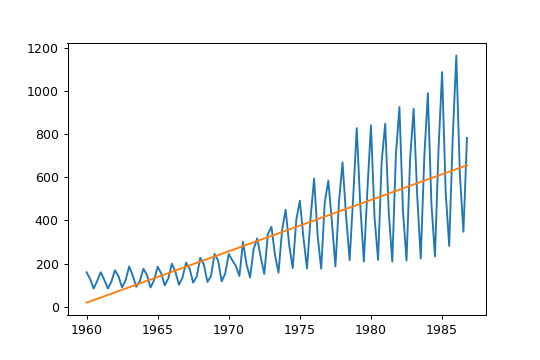

Год ошибка:		 28211.273187888597
Прогноз на 2016: 	 1351.5852858517464


In [84]:
X, y = data.drop('UKgas', axis=1), data.UKgas
fig, ax = plt.subplots()
ax.plot(X, y)
model = LinearRegression()
model.fit(X, y)
ax.plot(X, model.predict(X))
print('Год ошибка:\t\t', mean_squared_error(model.predict(X), y))
print("Прогноз на 2016: \t", model.predict([[2016]])[0])

In [86]:
times = [0.25, 0.5, 0.75, 0]
data_qs = [data[data.time % 1 == times[i]] for i in range(len(times))]
for i in range(len(data_qs)):
    data_q = data_qs[i]
    X, y = data_q.drop('UKgas', axis=1), data_q.UKgas
    model = LinearRegression()
    model.fit(X, y)
    print('Квартал %d ошибка: \t %f' % (i + 1, mean_squared_error(model.predict(X), y)))
    print("Прогноз на 2016: \t", model.predict([[2016]])[0], end='\n\n')

Квартал 1 ошибка: 	 1331.966781
Прогноз на 2016: 	 1072.3748015872989

Квартал 2 ошибка: 	 465.875347
Прогноз на 2016: 	 501.99188034187864

Квартал 3 ошибка: 	 3770.211511
Прогноз на 2016: 	 1654.7846560846592

Квартал 4 ошибка: 	 8693.141307
Прогноз на 2016: 	 2230.935917785915



***ЗАДАНИЕ 9***

Загрузите данные cars из пакета «datasets». Данные содержат зависимости тормозного пути автомобиля (футы) от его скорости (мили в час). Данные получены в 1920 г. Постройте регрессионную модель и оцените длину тормозного пути при скорости 40 миль в час. 

In [88]:
data = pd.read_csv('cars.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


MSE:	227.070421


<IPython.core.display.Javascript object>


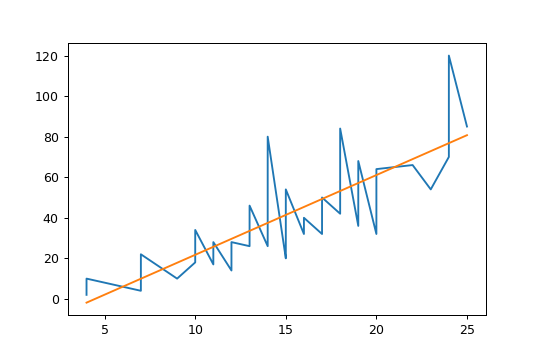

In [97]:
X, y = data.drop('dist', axis=1), data.dist
model = LinearRegression()
model.fit(X, y)
print('MSE:\t%f' % mean_squared_error(model.predict(X), y))

fig, ax = plt.subplots()
ax.plot(X, y)
ax.plot(X, model.predict(X))

In [98]:
model.predict([[40]])[0]

139.71725547445254